# 1.Feature Scaling

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
95,35,44000,0
67,23,82000,0
330,38,51000,0
4,19,76000,0
351,37,75000,0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Age'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standard scaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
X_train_scaled

In [10]:
# scaled value are array that is why we change them in dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [11]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [12]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [13]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# Effect of scaling

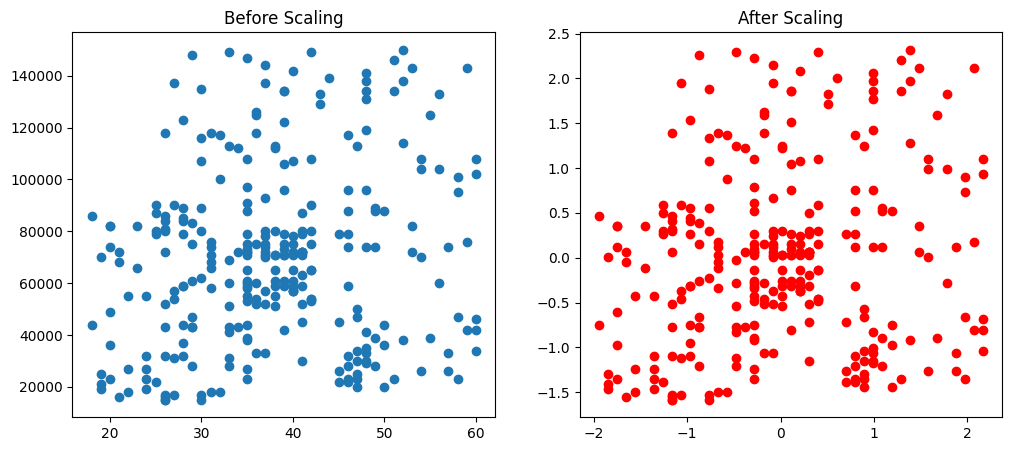

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

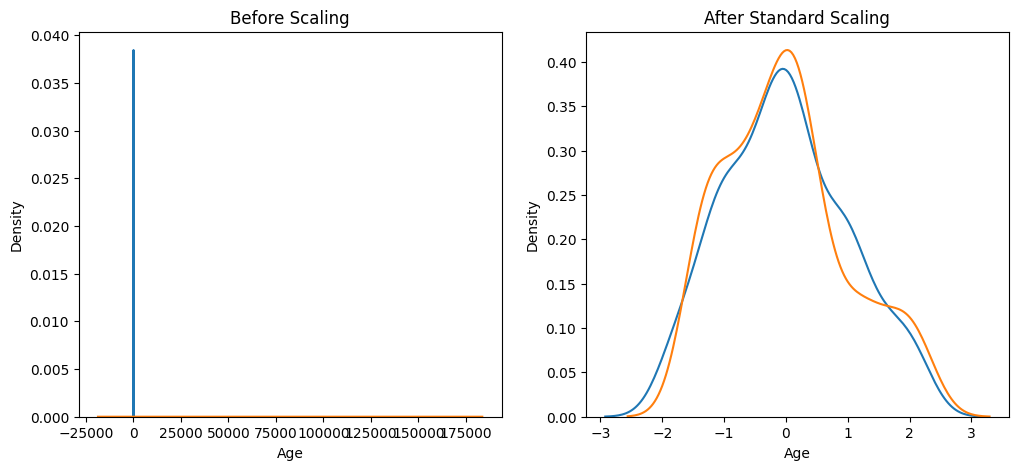

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# comparison in distribution

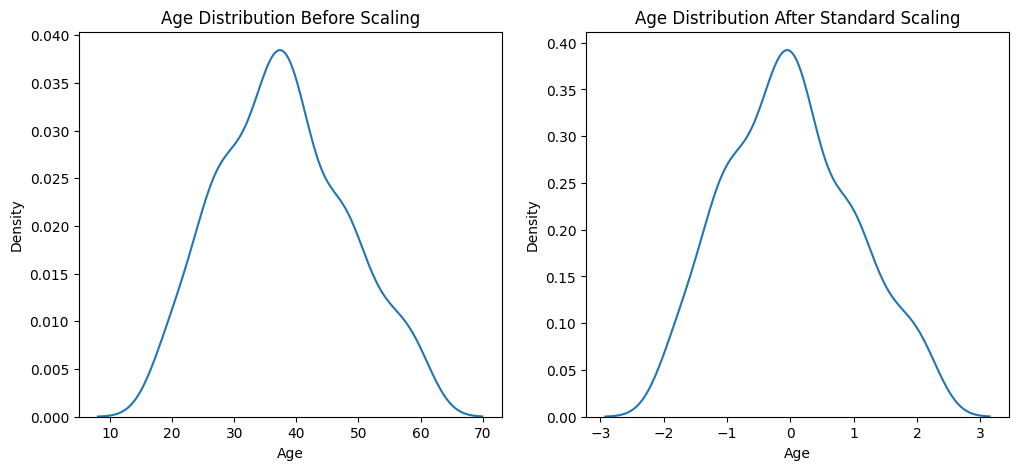

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

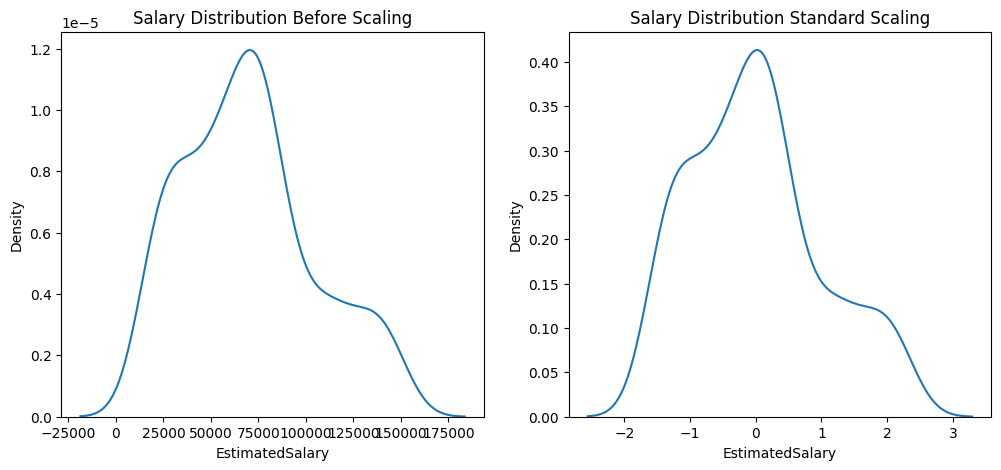

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, solver="lbfgs")
)
model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some 

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [30]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.058333333333333334
Scaled 0.13333333333333333


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [33]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [34]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [35]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [37]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9833333333333333
Scaled 0.9583333333333334


# Normalisation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [6]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

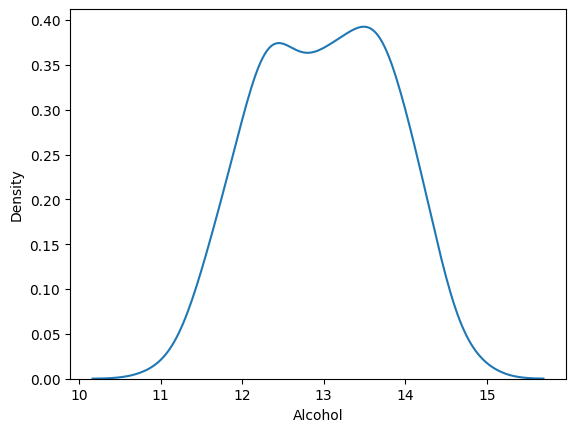

In [7]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic acid', ylabel='Density'>

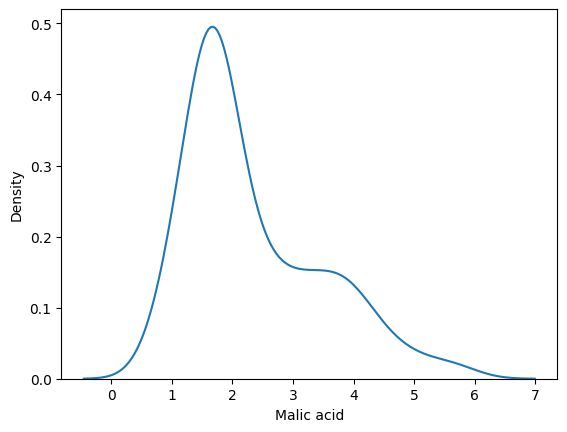

In [8]:
sns.kdeplot(df["Malic acid"])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

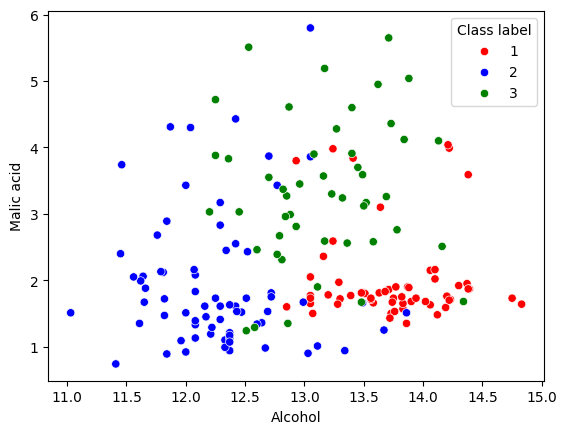

In [10]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),df['Class label'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [15]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


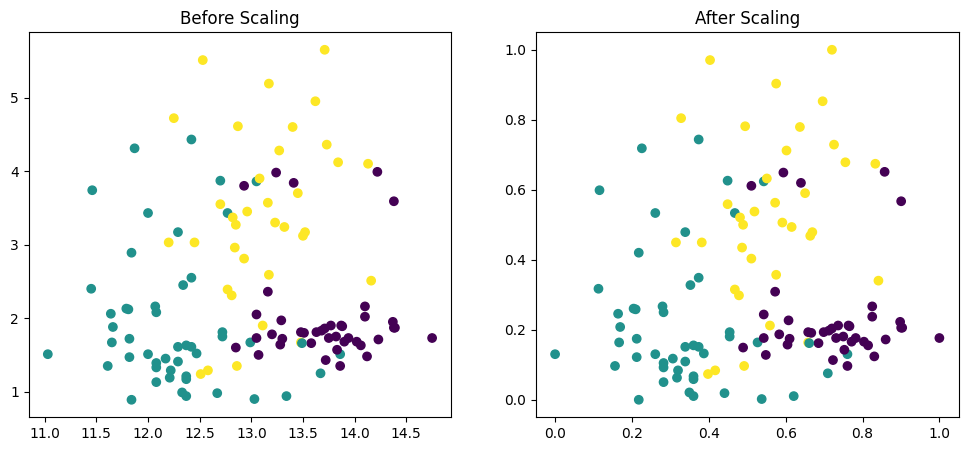

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

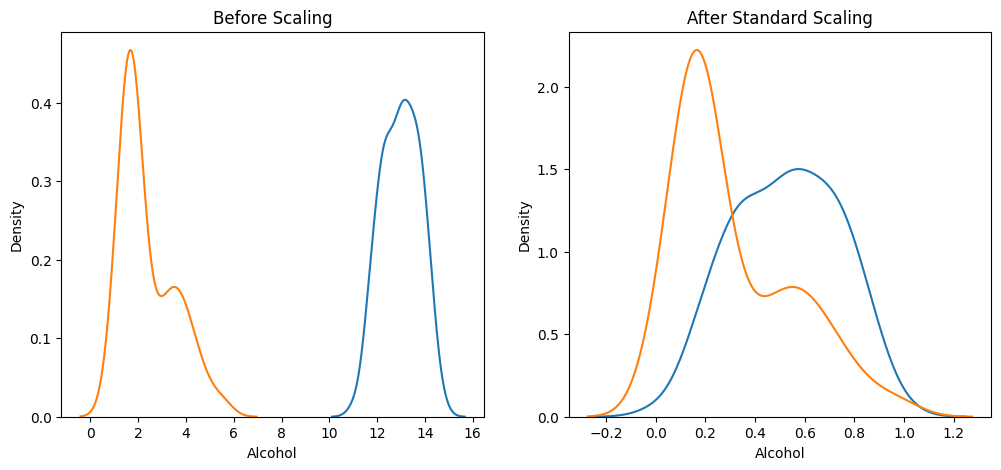

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

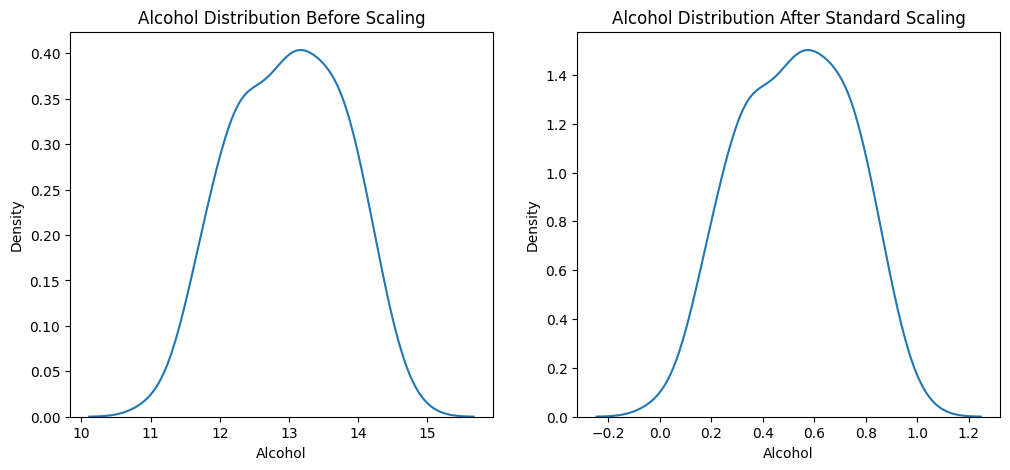

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

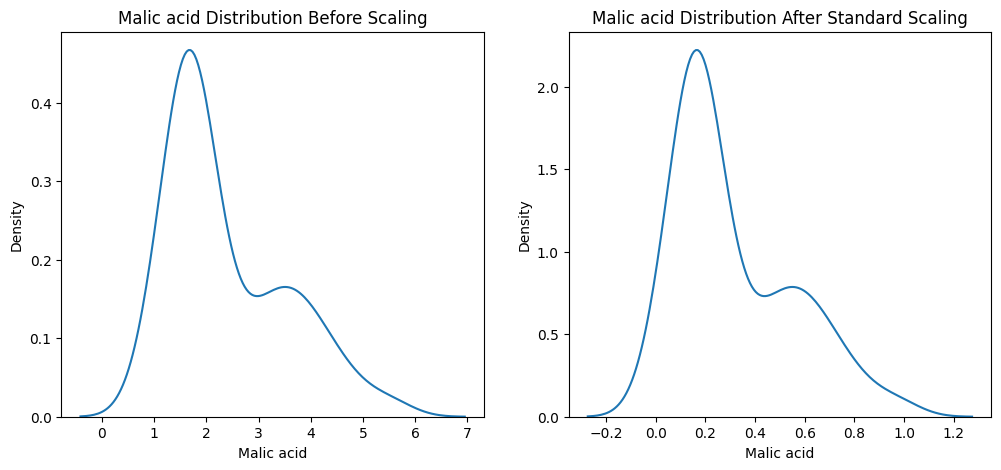

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

# Encoding 

## ordinal encoding


In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('customer.csv')

In [22]:
df.sample(5)

,age,gender,review,education,purchased
3,72,Female,Good,PG,No
42,30,Female,Good,PG,Yes
1,68,Female,Poor,UG,No
47,38,Female,Good,PG,Yes
19,97,Male,Poor,PG,Yes


In [23]:
df = df.iloc[:,2:]

In [25]:
df.sample(5)

,review,education,purchased
23,Good,School,No
21,Average,PG,No
40,Good,School,No
12,Poor,School,No
46,Poor,PG,No


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)

In [37]:
X_train

,review,education
35,Poor,School
12,Poor,School
49,Good,UG
1,Poor,UG
7,Poor,School
3,Good,PG
2,Good,PG
24,Average,PG
9,Good,UG
8,Average,UG


In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
X_train

,review,education
35,Poor,School
12,Poor,School
49,Good,UG
1,Poor,UG
7,Poor,School
3,Good,PG
2,Good,PG
24,Average,PG
9,Good,UG
8,Average,UG


In [38]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [39]:
oe.fit(X_train)

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute.","[['Poor', 'Average', ...], ['School', 'UG', ...]]"
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'use_encoded_value'}, default='error'When set to 'error' an error will be raised in case an unknowncategorical feature is present during transform. When set to'use_encoded_value', the encoded value of unknown categories will beset to the value given for the parameter `unknown_value`. In:meth:`inverse_transform`, an unknown category will be denoted as None... versionadded:: 0.24",'error'
,"unknown_value unknown_value: int or np.nan, default=NoneWhen the parameter handle_unknown is set to 'use_encoded_value', thisparameter is required and will set the encoded value of unknowncategories. It has to be distinct from the values used to encode any ofthe categories in `fit`. If set to np.nan, the `dtype` parameter mustbe a float dtype... versionadded:: 0.24",None
,"encoded_missing_value encoded_missing_value: int or np.nan, default=np.nanEncoded value of missing categories. If set to `np.nan`, then the `dtype`parameter must be a float dtype... versionadded:: 1.1",nan
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.3 Read more in the :ref:`User Guide `.",None
,"max_categories max_categories: int, default=NoneSpecifies an upper limit to the number of output categories for each inputfeature when considering infrequent categories. If there are infrequentcategories, `max_categories` includes the category representing theinfrequent categories along with the frequent categories. If `None`,there is no limit to the number of output features.`max_categories` do **not** take into account missing or unknowncategories. Setting `unknown_value` or `encoded_missing_value` to aninteger will increase the number of unique integer codes by one each.This can result in up to `max_categories + 2` integer codes... versionadded:: 1.3 Read more in the :ref:`User Guide `.",None


In [ ]:
# X_train_scaled = oe.transform(X_train)
# X_test_scaled = oe.transform(X_test)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [53]:
X_train

array([[0., 0.],
       [0., 0.],
       [2., 1.],
       [0., 1.],
       [0., 0.],
       [2., 2.],
       [2., 2.],
       [1., 2.],
       [2., 1.],
       [1., 1.],
       [2., 2.],
       [1., 0.],
       [0., 1.],
       [2., 2.],
       [1., 1.],
       [0., 2.],
       [2., 0.],
       [0., 0.],
       [0., 0.],
       [2., 0.],
       [0., 2.],
       [1., 2.],
       [0., 2.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [0., 2.],
       [2., 0.],
       [0., 2.],
       [2., 2.],
       [2., 0.],
       [2., 0.],
       [1., 1.],
       [2., 1.],
       [1., 0.],
       [0., 2.],
       [0., 2.],
       [0., 1.],
       [2., 2.]])

In [54]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()
le.fit(y_train)


LabelEncoder()

In [57]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [58]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [59]:
y_train

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

# One Hot Encoder

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
7648,Mahindra,120000,Diesel,First Owner,357000
3287,Mahindra,120000,Diesel,Third Owner,1000000
384,BMW,7500,Diesel,First Owner,5400000
1375,Honda,2118,Petrol,First Owner,475000
2232,Maruti,70000,Diesel,First Owner,300000


In [4]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

## 1. OneHotEncoding using Pandas

In [5]:
pd.get_dummies(df,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


## 2. K-1 OneHotEncoding

In [6]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


# 3. OneHotEncoding using Sklearn

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [8]:
X_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [9]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe = OneHotEncoder(drop='first',dtype=np.int32)

In [25]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']]).toarray()

In [27]:
X_test_new = ohe.transform(X_test[['fuel','owner']]).toarray()

In [28]:
X_train_new.shape

(6502, 7)

In [29]:
X_test_new

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], shape=(1626, 7), dtype=int32)

In [30]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], shape=(6502, 9), dtype=object)

## 4. OneHotEncoding with Top Categories

In [31]:
counts = df['brand'].value_counts()

In [33]:
counts

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [34]:
df['brand'].nunique()
threshold = 100

In [35]:
repl = counts[counts <= threshold].index

In [36]:
repl

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Land', 'Force', 'Isuzu', 'Ambassador',
       'Kia', 'MG', 'Daewoo', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [39]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).sample(10)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
5628,True,False,False,False,False,False,False,False,False,False,False,False,False
2747,False,False,False,False,False,False,True,False,False,False,False,False,False
6040,False,False,False,False,False,False,True,False,False,False,False,False,False
1532,False,False,False,False,False,False,False,False,False,True,False,False,False
5143,False,False,False,False,False,False,True,False,False,False,False,False,False
3050,False,False,False,False,False,False,True,False,False,False,False,False,False
615,False,False,True,False,False,False,False,False,False,False,False,False,False
5355,False,False,False,False,False,False,False,False,False,False,False,False,True
3354,False,False,False,False,False,False,False,True,False,False,False,False,False
1934,False,False,False,False,False,False,True,False,False,False,False,False,False
